In [1]:
import numpy as np
from sklearn.decomposition import PCA 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt 
from utils import create_data, see_random_data

# Constants

In [2]:
TOTAL_PIXELS = 533*260
VARIABILITY_THRESHOLD = 0.85

# Load Data

In [3]:
(X_train, y_train),(X_test,y_test) = create_data()

In [4]:
print(f'X_train -> {X_train.shape}')
print(f'y_train -> {y_train.shape}')
print(f'X_test -> {X_test.shape}')
print(f'y_test -> {y_test.shape}')

X_train -> (100, 260, 533)
y_train -> (100, 1)
X_test -> (44, 260, 533)
y_test -> (44, 1)


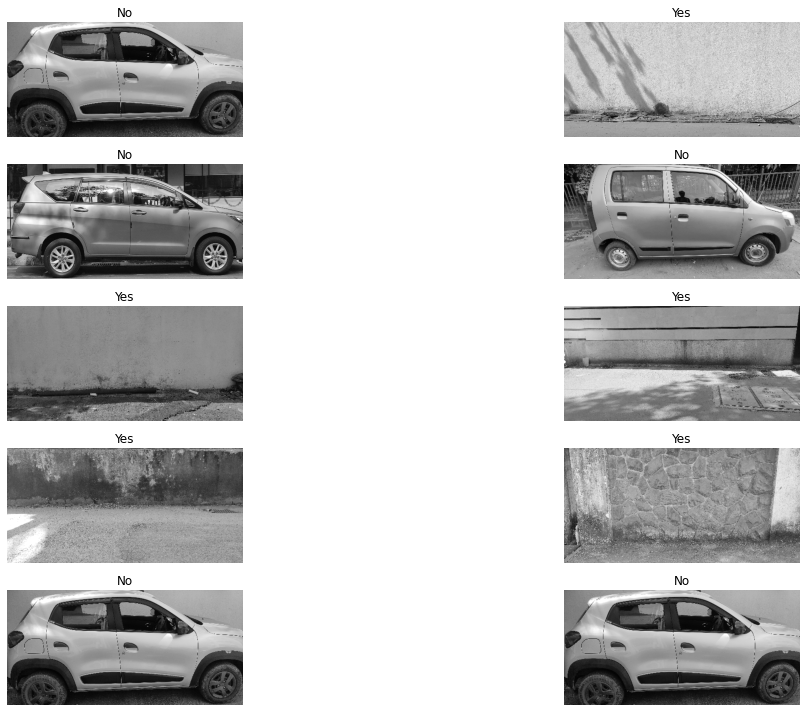

In [5]:
see_random_data(X_train, y_train)

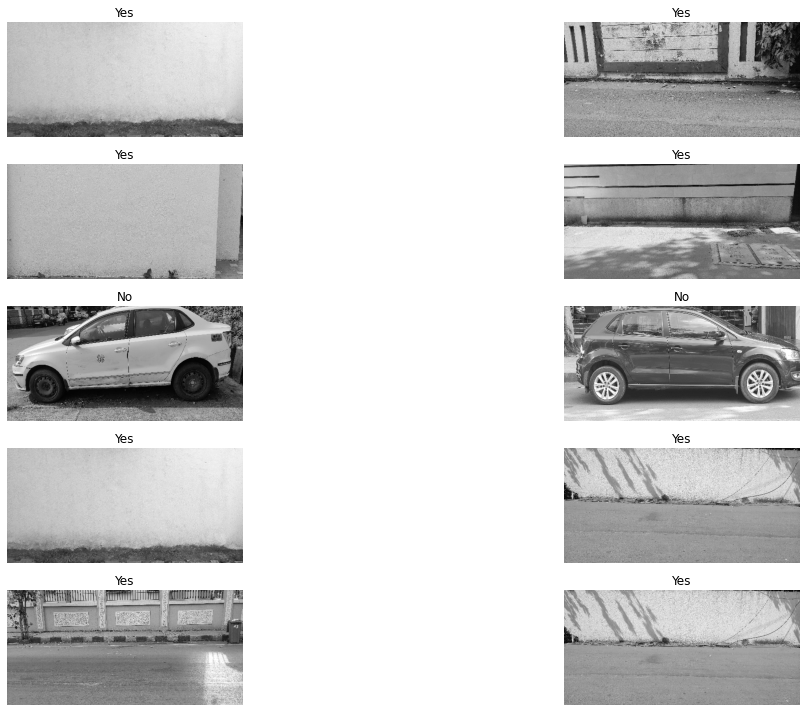

In [6]:
see_random_data(X_test, y_test)

In [7]:
model = Sequential()
model.add(Flatten(input_shape =  (260,533)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 138580)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               17738368  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 3

In [9]:
model.fit(X_train, y_train,batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
4/4 [==============================] - 2s 147ms/step - loss: 0.6932 - accuracy: 0.4600 - val_loss: 0.6931 - val_accuracy: 0.5455
Epoch 2/30
4/4 [==============================] - 0s 36ms/step - loss: 0.6932 - accuracy: 0.5400 - val_loss: 0.6931 - val_accuracy: 0.5455
Epoch 3/30
4/4 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5400 - val_loss: 0.6930 - val_accuracy: 0.5455
Epoch 4/30
4/4 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5400 - val_loss: 0.6930 - val_accuracy: 0.5455
Epoch 5/30
4/4 [==============================] - 0s 33ms/step - loss: 0.6930 - accuracy: 0.5400 - val_loss: 0.6930 - val_accuracy: 0.5455
Epoch 6/30
4/4 [==============================] - 0s 34ms/step - loss: 0.6930 - accuracy: 0.5400 - val_loss: 0.6929 - val_accuracy: 0.5455
Epoch 7/30
4/4 [==============================] - 0s 33ms/step - loss: 0.6929 - accuracy: 0.5400 - val_loss: 0.6929 - val_accuracy: 0.5455
Epoch 8/30
4/4 [==========

In [10]:
X_train_pca = X_train.reshape(X_train.shape[0],TOTAL_PIXELS)
X_test_pca = X_test.reshape(X_test.shape[0],TOTAL_PIXELS)

In [11]:
pca = PCA()
pca.fit(X_train_pca)

PCA()

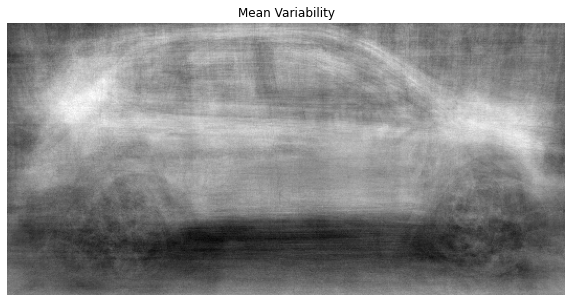

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(pca.mean_.reshape(260,533), cmap='gray')
ax.axis('off')
ax.set_title('Mean Variability')
plt.show()

In [13]:
n_components = None 
exp_var = pca.explained_variance_ratio_
for i in range(len(exp_var)):
    if exp_var[:i].sum()>=VARIABILITY_THRESHOLD:
        n_components = i
        print(f'We need {n_components} principal components to capture {VARIABILITY_THRESHOLD*100}% variability')
        break

We need 34 principal components to capture 85.0% variability


In [14]:
X_train_tr = pca.transform(X_train_pca)[:,:n_components]
X_test_tr = pca.transform(X_test_pca)[:,:n_components]

In [15]:
model_pca = Sequential()
model_pca.add(Dense(units=128, activation='relu', input_shape = (n_components,)))
model_pca.add(Dense(units=64, activation='relu'))
model_pca.add(Dense(units=32, activation='relu'))
model_pca.add(Dense(units=16, activation='relu'))
model_pca.add(Dense(units=8, activation='relu'))
model_pca.add(Dense(units=4, activation='relu'))
model_pca.add(Dense(units=2, activation='relu'))
model_pca.add(Dense(units=1, activation='sigmoid'))

model_pca.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [16]:
model_pca.fit(X_train_tr, y_train,batch_size=32, epochs=30, validation_data=(X_test_tr,y_test))

Epoch 1/30
4/4 [==============================] - 1s 45ms/step - loss: 0.9531 - accuracy: 0.6200 - val_loss: 0.5669 - val_accuracy: 0.7045
Epoch 2/30
4/4 [==============================] - 0s 12ms/step - loss: 0.5368 - accuracy: 0.7600 - val_loss: 0.5108 - val_accuracy: 0.7727
Epoch 3/30
4/4 [==============================] - 0s 13ms/step - loss: 0.4653 - accuracy: 0.8500 - val_loss: 0.4703 - val_accuracy: 0.8636
Epoch 4/30
4/4 [==============================] - 0s 12ms/step - loss: 0.4193 - accuracy: 0.9200 - val_loss: 0.4413 - val_accuracy: 0.8636
Epoch 5/30
4/4 [==============================] - 0s 12ms/step - loss: 0.3956 - accuracy: 0.9600 - val_loss: 0.4183 - val_accuracy: 0.8636
Epoch 6/30
4/4 [==============================] - 0s 12ms/step - loss: 0.3773 - accuracy: 0.9800 - val_loss: 0.4032 - val_accuracy: 0.8864
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 0.3626 - accuracy: 0.9500 - val_loss: 0.3886 - val_accuracy: 0.8864
Epoch 8/30
4/4 [===========

88.64% accuracy with PCA on test set

In [17]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'We get {train_acc*100}% accuracy on train set and {test_acc*100}% accuracy with NN without PCA')

2/2 [==============================] - 0s 22ms/step - loss: 0.6917 - accuracy: 0.5455
We get 54.00000214576721% accuracy on train set and 54.54545617103577% accuracy with NN without PCA


In [18]:
train_loss_pca, train_acc_pca = model_pca.evaluate(X_train_tr, y_train)
test_loss_pca, test_acc_pca = model_pca.evaluate(X_test_tr, y_test)

print(f'We get {train_acc_pca*100}% accuracy ono train set and {test_acc_pca*100}% accuracy on test set with NN with PCA')

2/2 [==============================] - 0s 4ms/step - loss: 0.3388 - accuracy: 0.8864
We get 100.0% accuracy ono train set and 88.63636255264282% accuracy on test set with NN with PCA
